In [1]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [121]:
from importlib import reload
import pytorch_model
reload(pytorch_model)
from pytorch_model import Bowzer, evaluate
from torchvision.utils import make_grid

Running on device: cpu


In [122]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [123]:

from torch.utils.tensorboard import SummaryWriter
from tensorboard import notebook

In [124]:
bowzer = Bowzer(resize_n=128)
bowzer.writer_ = SummaryWriter(bowzer.writer_path)

In [125]:
image, shape = next(iter(bowzer.dataloader_train))
print(image.shape)#, image.squeeze().permute(1,2,0))

torch.Size([16, 3, 128, 128])


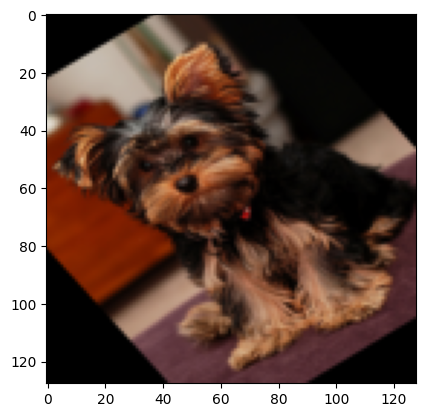

In [126]:
bowzer.show_img(bowzer.train_data._images[-1].as_posix(), bowzer.train_transforms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.01394335..1.0000002].


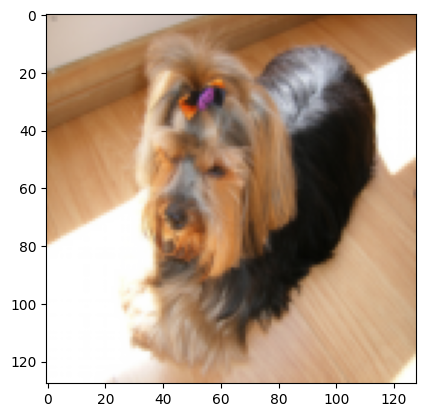

In [127]:
bowzer.show_img(bowzer.test_data._images[-1].as_posix(), bowzer.test_transforms)

In [128]:
from torch.utils.tensorboard import SummaryWriter

bowzer.writer_ = SummaryWriter(bowzer.writer_path)

In [129]:
bowzer.train_eval(epochs=25)

EPOCH 1:
LOSS Train 0 Test: 3.391664981842041
EPOCH 2:
LOSS Train 0 Test: 4.053828239440918
EPOCH 3:
LOSS Train 0 Test: 3.487534999847412
EPOCH 4:
LOSS Train 0 Test: 3.3527212142944336
EPOCH 5:
LOSS Train 0 Test: 3.607414722442627
EPOCH 6:
LOSS Train 0 Test: 3.2863547801971436
EPOCH 7:
LOSS Train 0 Test: 3.2684264183044434
EPOCH 8:
LOSS Train 0 Test: 3.4879469871520996
EPOCH 9:
LOSS Train 0 Test: 3.400581121444702
EPOCH 10:
LOSS Train 0 Test: 3.289746046066284
EPOCH 11:
LOSS Train 0 Test: 3.493952989578247
EPOCH 12:
LOSS Train 0 Test: 3.400831937789917
EPOCH 13:
LOSS Train 0 Test: 3.458754301071167
EPOCH 14:
LOSS Train 0 Test: 3.507410764694214
EPOCH 15:


KeyboardInterrupt: 

In [10]:
images, labels = next(iter(bowzer.dataloader_train))

bowzer.writer.add_graph(bowzer.net, images)
bowzer.writer.flush()

In [11]:

images, labels = next(iter(bowzer.dataloader_train))

# Create a grid from the images and show them
img_grid = make_grid(images)
bowzer.writer.add_image('Training Images', img_grid)
bowzer.writer.flush()

In [12]:
bowzer.writer.close()

In [250]:
%tensorboard --logdir=bowzer.writer.log_dir

Reusing TensorBoard on port 6007 (pid 83141), started 0:03:12 ago. (Use '!kill 83141' to kill it.)

In [20]:

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir bowzer/runs (started 3:34:12 ago; pid 80445)
  - port 6007: logdir bowzer.writer.log_dir (started 2:57:49 ago; pid 83141)


In [263]:
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir bowzer/runs (started 0:52:19 ago; port 6006, pid 80445).


In [150]:
bowzer.train(epochs=10)

Epoch 1, Loss: 3.5011
Epoch 2, Loss: 3.2826
Epoch 3, Loss: 3.1545
Epoch 4, Loss: 3.0604
Epoch 5, Loss: 3.0109
Epoch 6, Loss: 2.9726
Epoch 7, Loss: 2.9416
Epoch 8, Loss: 2.9127
Epoch 9, Loss: 2.8957
Epoch 10, Loss: 2.8747
Epoch 11, Loss: 2.8370
Epoch 12, Loss: 2.8245
Epoch 13, Loss: 2.8054
Epoch 14, Loss: 2.7881
Epoch 15, Loss: 2.7803
Epoch 16, Loss: 2.7162
Epoch 17, Loss: 2.7170
Epoch 18, Loss: 2.7043
Epoch 19, Loss: 2.6911
Epoch 20, Loss: 2.6778
Epoch 21, Loss: 2.6312


KeyboardInterrupt: 

In [21]:
precision, recall = evaluate(
        model = bowzer.net,
        num_classes=bowzer.num_classes,
        dataloader_test=bowzer.dataloader_test,
        average = 'macro'
        )

Precision: 0.18747995793819427
Recall: 0.18235823512077332


In [22]:
precision_by_class, recall_by_class = evaluate(
        model = bowzer.net,
        num_classes=bowzer.num_classes,
        dataloader_test=bowzer.dataloader_test,
        average = None
        )

Precision: tensor([0.1290, 0.1154, 0.1837, 0.1592, 0.1866, 0.1477, 0.3000, 0.3194, 0.1364,
        0.2269, 0.0930, 0.2581, 0.0753, 0.0877, 0.1566, 0.1935, 0.1923, 0.2766,
        0.2321, 0.1523, 0.1484, 0.1377, 0.3840, 0.2000, 0.2247, 0.3125, 0.0625,
        0.2745, 0.2156, 0.2078, 0.2045, 0.0820, 0.2188, 0.2889, 0.0977, 0.1333,
        0.1220])
Recall: tensor([0.1633, 0.1200, 0.0900, 0.3200, 0.2500, 0.1300, 0.0600, 0.5227, 0.0606,
        0.2700, 0.0400, 0.2474, 0.0700, 0.1000, 0.2600, 0.2400, 0.1000, 0.1300,
        0.1313, 0.3000, 0.1900, 0.2300, 0.4800, 0.0200, 0.2000, 0.1500, 0.0300,
        0.1400, 0.3600, 0.4800, 0.0909, 0.1000, 0.2100, 0.1300, 0.1910, 0.0400,
        0.1000])


In [23]:
{k: precision_by_class[v].item() for k, v in bowzer.test_data.class_to_idx.items()}

{'Abyssinian': 0.12903225421905518,
 'American Bulldog': 0.11538461595773697,
 'American Pit Bull Terrier': 0.18367347121238708,
 'Basset Hound': 0.15920397639274597,
 'Beagle': 0.18656715750694275,
 'Bengal': 0.14772726595401764,
 'Birman': 0.30000001192092896,
 'Bombay': 0.3194444477558136,
 'Boxer': 0.13636364042758942,
 'British Shorthair': 0.22689075767993927,
 'Chihuahua': 0.09302325546741486,
 'Egyptian Mau': 0.25806450843811035,
 'English Cocker Spaniel': 0.07526881992816925,
 'English Setter': 0.08771929889917374,
 'German Shorthaired': 0.15662650763988495,
 'Great Pyrenees': 0.19354838132858276,
 'Havanese': 0.19230769574642181,
 'Japanese Chin': 0.27659574151039124,
 'Keeshond': 0.2321428507566452,
 'Leonberger': 0.15228426456451416,
 'Maine Coon': 0.1484375,
 'Miniature Pinscher': 0.13772454857826233,
 'Newfoundland': 0.3840000033378601,
 'Persian': 0.20000000298023224,
 'Pomeranian': 0.2247191071510315,
 'Pug': 0.3125,
 'Ragdoll': 0.0625,
 'Russian Blue': 0.274509817361831

In [24]:
{k: recall_by_class[v].item() for k, v in bowzer.test_data.class_to_idx.items()}

{'Abyssinian': 0.16326530277729034,
 'American Bulldog': 0.11999999731779099,
 'American Pit Bull Terrier': 0.09000000357627869,
 'Basset Hound': 0.3199999928474426,
 'Beagle': 0.25,
 'Bengal': 0.12999999523162842,
 'Birman': 0.05999999865889549,
 'Bombay': 0.5227272510528564,
 'Boxer': 0.06060606241226196,
 'British Shorthair': 0.27000001072883606,
 'Chihuahua': 0.03999999910593033,
 'Egyptian Mau': 0.24742268025875092,
 'English Cocker Spaniel': 0.07000000029802322,
 'English Setter': 0.10000000149011612,
 'German Shorthaired': 0.25999999046325684,
 'Great Pyrenees': 0.23999999463558197,
 'Havanese': 0.10000000149011612,
 'Japanese Chin': 0.12999999523162842,
 'Keeshond': 0.13131313025951385,
 'Leonberger': 0.30000001192092896,
 'Maine Coon': 0.1899999976158142,
 'Miniature Pinscher': 0.23000000417232513,
 'Newfoundland': 0.47999998927116394,
 'Persian': 0.019999999552965164,
 'Pomeranian': 0.20000000298023224,
 'Pug': 0.15000000596046448,
 'Ragdoll': 0.029999999329447746,
 'Russian 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.13593705..1.0000005].


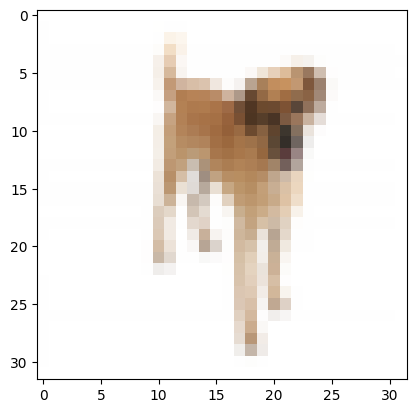

In [47]:
# Load and transform image
#jason_segel = Image.open("/Users/kristinaqualben/Downloads/jason-segel.jpeg")
jason_segel = "/Users/kristinaqualben/Downloads/jason-segel.jpeg"
target = 'puggle' #'paul_rudd' 'puggle' 'jason_segel'
image_path =  f"/Volumes/KCQDrive/projects/images/{target}.jpg"
bowzer.show_img(image_path, bowzer.test_transforms)

In [48]:
from PIL import Image
import torch
pred_image = Image.open(image_path)
pred_image_tensor = bowzer.test_transforms(pred_image)
pred_image_tensor_reshaped = pred_image_tensor.unsqueeze(0)

bowzer.net.eval()
with torch.no_grad():
    pred = bowzer.net(pred_image_tensor_reshaped).squeeze(0)
pred_cls = pred.softmax(0)
cls_id = pred_cls.argmax().item()


In [49]:
import pandas as pd
dog_matches = {k: pred_cls.data[v].item() for k, v in bowzer.test_data.class_to_idx.items()}
pred_df = pd.DataFrame(dog_matches.items(), columns = ['dog','probability']).sort_values(by = 'probability', ascending=False).reset_index(drop=True)
pred_df

,dog,probability
0,Saint Bernard,0.279668
1,Chihuahua,0.198861
2,Miniature Pinscher,0.059055
3,Pomeranian,0.055926
4,Maine Coon,0.055349
5,Beagle,0.052331
6,Japanese Chin,0.044882
7,Bengal,0.034491
8,American Pit Bull Terrier,0.031317
9,German Shorthaired,0.023957
